<a href="https://colab.research.google.com/github/vanessabrolim/comfort_analysis/blob/master/anotacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats
from geopy.distance import vincenty
from google.colab import drive
drive.mount('/content/drive',  force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df_q = pd.read_pickle('drive/My Drive/Udesc/questionarios.pkl')
df = pd.read_pickle('drive/My Drive/Udesc/df_valid.pkl')

In [3]:
df_q.dtypes

Início    datetime64[ns]
Fim       datetime64[ns]
x                float64
y                float64
z                float64
Geral            float64
dtype: object

In [4]:
df_q.describe

<bound method NDFrame.describe of                 Início                 Fim    x    y    z  Geral
0  2017-09-13 08:47:00 2017-09-13 09:02:00  2.0  4.0  3.0    4.0
1  2017-09-13 09:02:00 2017-09-13 09:16:00  2.0  4.0  4.0    4.0
2  2017-09-13 11:15:00 2017-09-13 11:30:00  2.0  5.0  5.0    4.0
3  2017-09-13 11:30:00 2017-09-13 11:35:00  2.0  4.0  4.0    4.0
4  2017-09-13 11:35:00 2017-09-13 11:36:00  4.0  4.0  4.0    4.0
5  2017-09-13 11:50:00 2017-09-13 12:05:00  2.0  3.0  3.0    4.0
6  2017-09-13 12:10:00 2017-09-13 12:25:00  3.0  3.0  4.0    4.0
7  2017-09-13 12:25:00 2017-09-13 12:30:00  3.0  2.0  3.0    3.0
8  2017-09-14 09:10:00 2017-09-14 09:25:00  4.0  3.0  3.0    3.0
9  2017-09-14 11:17:00 2017-09-14 11:32:00  3.0  5.0  5.0    4.0
10 2017-09-14 11:32:00 2017-09-14 11:35:00  4.0  5.0  5.0    4.0
11 2017-09-15 05:08:00 2017-09-15 05:23:00  4.0  4.0  4.0    3.0
12 2017-09-15 19:40:00 2017-09-15 19:55:00  5.0  4.0  4.0    4.0
13 2017-09-15 19:55:00 2017-09-15 20:10:00  5.0  5.0  5.

In [5]:
df_q.groupby('x').Início.nunique()

x
1.0     1
2.0    11
3.0    18
4.0    36
5.0     6
Name: Início, dtype: int64

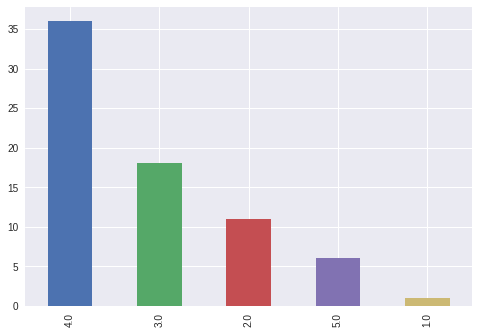

In [6]:
pd.value_counts(df_q['x']).plot.bar()

In [7]:
df_q.groupby('y').Início.nunique()

y
1.0     1
2.0     3
3.0    13
4.0    44
5.0    11
Name: Início, dtype: int64

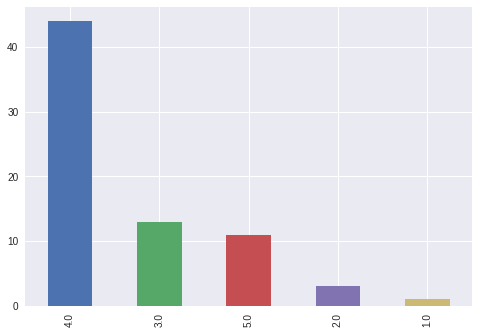

In [8]:
pd.value_counts(df_q['y']).plot.bar()

In [9]:
df_q.groupby('z').Início.nunique()

z
2.0     2
3.0    11
4.0    42
5.0    17
Name: Início, dtype: int64

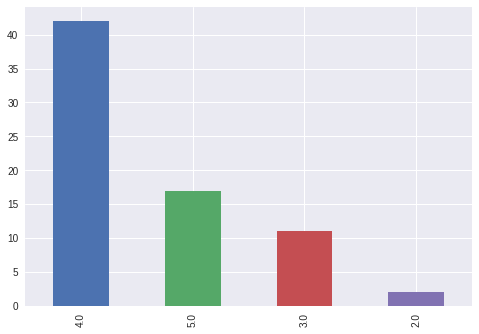

In [10]:
pd.value_counts(df_q['z']).plot.bar()

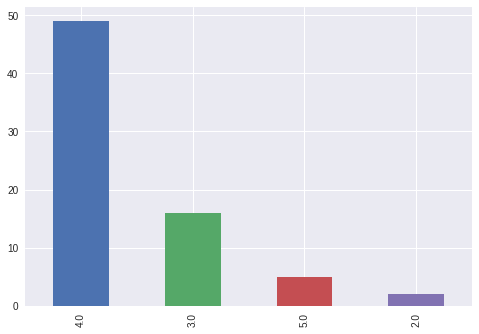

In [11]:
pd.value_counts(df_q['Geral']).plot.bar()

In [12]:
df_q.groupby('Geral').Início.nunique()

Geral
2.0     2
3.0    16
4.0    49
5.0     5
Name: Início, dtype: int64

In [13]:
df.dtypes

DATE_TIME                   datetime64[ns]
LATITUDE                           float64
LONGITUDE                          float64
ENGINE_RPM                         float64
ENGINE_LOAD                        float64
INTAKE_MANIFOLD_PRESSURE           float64
ACCELERATOR_PEDAL_D                float64
SPEED                              float64
GYROSCOPE_X_RAW                    float64
GYROSCOPE_Y_RAW                    float64
GYROSCOPE_Z_RAW                    float64
ACCELEROMETER_X_LONG_AVG           float64
ACCELEROMETER_Y_LONG_AVG           float64
ACCELEROMETER_Z_LONG_AVG           float64
ACCELEROMETER_X_LONG_STD           float64
ACCELEROMETER_Y_LONG_STD           float64
ACCELEROMETER_Z_LONG_STD           float64
dtype: object

In [14]:
df.shape

(625500, 17)

In [0]:
df_completo = pd.DataFrame(columns=('date_time', 
                                    'latitude', 
                                    'longitude', 
                                    'engine_rpm', 
                                    'engine_load', 
                                    'intake_manifold_pressure',
                                    'accelerator_pedal',
                                    'speed',
                                    'giroscope_x',
                                    'giroscope_y',
                                    'giroscope_z',
                                    'accelerometer_x_avg',
                                    'accelerometer_y_avg',
                                    'accelerometer_z_avg',
                                    'accelerometer_x_std',
                                    'accelerometer_y_std',
                                    'accelerometer_z_std',
                                    'comfort_x',
                                    'comfort_y',
                                    'comfort_z',
                                    'comfort_geral'
                                   ))

df_completo = df_completo.astype(dtype={'date_time' : 'datetime64[ns]', 
                          'latitude' : 'float64', 
                          'longitude' : 'float64', 
                          'engine_rpm' : 'float64', 
                          'engine_load' : 'float64', 
                          'intake_manifold_pressure' : 'float64',
                          'accelerator_pedal' : 'float64',
                          'speed' : 'float64',
                          'giroscope_x' : 'float64',
                          'giroscope_y' : 'float64',
                          'giroscope_z' : 'float64',
                          'accelerometer_x_avg' : 'float64',
                          'accelerometer_y_avg' : 'float64',
                          'accelerometer_z_avg' : 'float64',
                          'accelerometer_x_std' : 'float64',
                          'accelerometer_y_std' : 'float64',
                          'accelerometer_z_std' : 'float64',
                          'comfort_x' : 'int64',
                          'comfort_y' : 'int64',
                          'comfort_z' : 'int64',
                          'comfort_geral' : 'int64'
                         })

In [0]:
df_q.sort_index(inplace=True)
df.sort_index(inplace=True)

In [0]:
completo = []
for indexq, rowq in df_q.iterrows():
  for index, row in df.iterrows():
    if row['DATE_TIME'] >= rowq['Início'] and row['DATE_TIME'] <= rowq['Fim']:
      dict1 = {'date_time' : row['DATE_TIME'],
               'latitude' : row['LATITUDE'],
               'longitude' : row['LONGITUDE'],
               'engine_rpm' : row['ENGINE_RPM'],
               'engine_load': row['ENGINE_LOAD'],
               'intake_manifold_pressure' : row['INTAKE_MANIFOLD_PRESSURE'],
               'accelerator_pedal' : row['ACCELERATOR_PEDAL_D'],
               'speed' : row['SPEED'],
               'giroscope_x' : row['GYROSCOPE_X_RAW'],
               'giroscope_y' : row['GYROSCOPE_Y_RAW'],
               'giroscope_z' : row['GYROSCOPE_Z_RAW'],
               'accelerometer_x_avg' : row['ACCELEROMETER_X_LONG_AVG'],
               'accelerometer_y_avg' : row['ACCELEROMETER_Y_LONG_AVG'],
               'accelerometer_z_avg' : row['ACCELEROMETER_Z_LONG_AVG'],
               'accelerometer_x_std' : row['ACCELEROMETER_X_LONG_STD'],
               'accelerometer_y_std' : row['ACCELEROMETER_Y_LONG_STD'],
               'accelerometer_z_std' : row['ACCELEROMETER_Z_LONG_STD'],
               'comfort_x' : rowq['x'],
               'comfort_y' : rowq['y'],
               'comfort_z' : rowq['z'],
               'comfort_geral' : rowq['Geral'],
               'group': indexq}
      completo.append(dict1)

In [18]:
len(completo)

65880

In [0]:
df_completo = pd.DataFrame(completo, columns=('date_time', 
                                    'latitude', 
                                    'longitude', 
                                    'engine_rpm', 
                                    'engine_load', 
                                    'intake_manifold_pressure',
                                    'accelerator_pedal',
                                    'speed',
                                    'giroscope_x',
                                    'giroscope_y',
                                    'giroscope_z',
                                    'accelerometer_x_avg',
                                    'accelerometer_y_avg',
                                    'accelerometer_z_avg',
                                    'accelerometer_x_std',
                                    'accelerometer_y_std',
                                    'accelerometer_z_std',
                                    'comfort_x',
                                    'comfort_y',
                                    'comfort_z',
                                    'comfort_geral',
                                    'group'
                                   ))

In [20]:
df_completo.head()

,date_time,latitude,longitude,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,...,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z,comfort_geral,group
0,2017-09-15 05:08:00.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.067179,-1.25,-0.19,...,-0.001468,0.137074,0.003179,0.002818,0.004750,4.0,4.0,4.0,3.0,11
1,2017-09-15 05:08:00.802,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.064182,-1.35,-0.24,...,-0.001498,0.137080,0.003187,0.002802,0.004716,4.0,4.0,4.0,3.0,11
2,2017-09-15 05:08:01.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.068411,-1.31,-0.22,...,-0.001492,0.137077,0.003184,0.002805,0.004632,4.0,4.0,4.0,3.0,11
3,2017-09-15 05:08:01.802,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.091982,-1.25,-0.26,...,-0.001482,0.137097,0.003187,0.002815,0.004624,4.0,4.0,4.0,3.0,11
4,2017-09-15 05:08:02.302,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.122900,-1.23,0.01,...,-0.001488,0.137067,0.003190,0.002821,0.004583,4.0,4.0,4.0,3.0,11


In [21]:
df_completo.dtypes

date_time                   datetime64[ns]
latitude                           float64
longitude                          float64
engine_rpm                         float64
engine_load                        float64
intake_manifold_pressure           float64
accelerator_pedal                  float64
speed                              float64
giroscope_x                        float64
giroscope_y                        float64
giroscope_z                        float64
accelerometer_x_avg                float64
accelerometer_y_avg                float64
accelerometer_z_avg                float64
accelerometer_x_std                float64
accelerometer_y_std                float64
accelerometer_z_std                float64
comfort_x                          float64
comfort_y                          float64
comfort_z                          float64
comfort_geral                      float64
group                                int64
dtype: object

In [22]:
df_completo.loc[df_completo['comfort_x'] == float('nan')]

,date_time,latitude,longitude,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,...,accelerometer_y_avg,accelerometer_z_avg,accelerometer_x_std,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z,comfort_geral,group


In [0]:
df_completo['abs_accelerometer_x_avg'] = df_completo['accelerometer_x_avg'].abs()
df_completo['abs_accelerometer_y_avg'] = df_completo['accelerometer_y_avg'].abs()
df_completo['abs_accelerometer_z_avg'] = df_completo['accelerometer_z_avg'].abs()

In [24]:
df_completo.head()

,date_time,latitude,longitude,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,...,accelerometer_y_std,accelerometer_z_std,comfort_x,comfort_y,comfort_z,comfort_geral,group,abs_accelerometer_x_avg,abs_accelerometer_y_avg,abs_accelerometer_z_avg
0,2017-09-15 05:08:00.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.067179,-1.25,-0.19,...,0.002818,0.004750,4.0,4.0,4.0,3.0,11,1.018676,0.001468,0.137074
1,2017-09-15 05:08:00.802,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.064182,-1.35,-0.24,...,0.002802,0.004716,4.0,4.0,4.0,3.0,11,1.018656,0.001498,0.137080
2,2017-09-15 05:08:01.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.068411,-1.31,-0.22,...,0.002805,0.004632,4.0,4.0,4.0,3.0,11,1.018635,0.001492,0.137077
3,2017-09-15 05:08:01.802,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.091982,-1.25,-0.26,...,0.002815,0.004624,4.0,4.0,4.0,3.0,11,1.018619,0.001482,0.137097
4,2017-09-15 05:08:02.302,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.122900,-1.23,0.01,...,0.002821,0.004583,4.0,4.0,4.0,3.0,11,1.018565,0.001488,0.137067


In [25]:
df_completo.shape

(65880, 25)

In [26]:
df_completo.groupby('comfort_x').date_time.nunique()

comfort_x
2.0     4080
3.0    12360
4.0    40440
5.0     9000
Name: date_time, dtype: int64

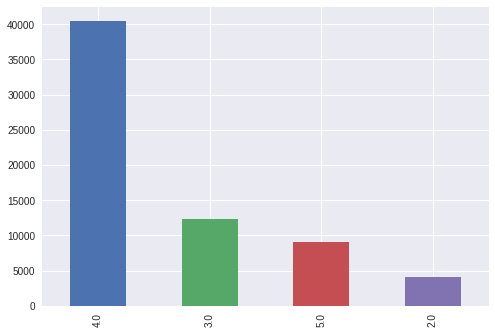

In [27]:
pd.value_counts(df_completo['comfort_x']).plot.bar()

In [28]:
df_completo.groupby('comfort_y').date_time.nunique()

comfort_y
2.0     1800
3.0     4080
4.0    47640
5.0    12360
Name: date_time, dtype: int64

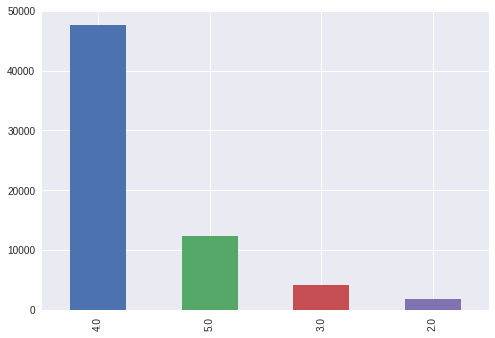

In [29]:
pd.value_counts(df_completo['comfort_y']).plot.bar()

In [30]:
df_completo.groupby('comfort_z').date_time.nunique()

comfort_z
3.0     5880
4.0    38880
5.0    21120
Name: date_time, dtype: int64

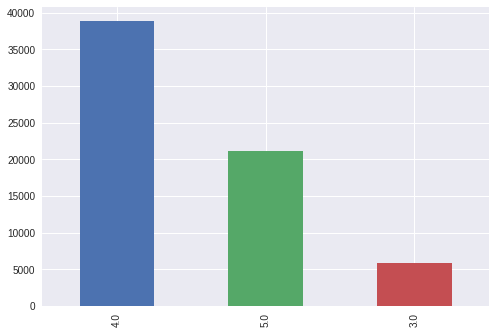

In [31]:
pd.value_counts(df_completo['comfort_z']).plot.bar()

In [32]:
df_completo.groupby('comfort_geral').date_time.nunique()

comfort_geral
2.0     1800
3.0    13320
4.0    43560
5.0     7200
Name: date_time, dtype: int64

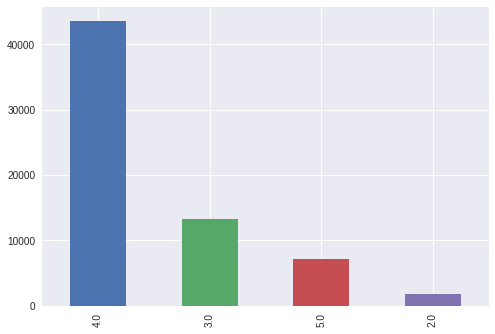

In [33]:
pd.value_counts(df_completo['comfort_geral']).plot.bar()

In [0]:
df_completo.to_pickle("./df_noted.pkl")

In [76]:
buckets = []
for i in range(11, 52, 1):
  todos = df_completo.loc[df_completo['group'] == i]
  todos['quintil_x'] = pd.cut(todos['abs_accelerometer_x_avg'], bins=5, labels=False) + 1
  todos['quintil_y'] = pd.cut(todos['abs_accelerometer_y_avg'], bins=5, labels=False) + 1
  todos['quintil_z'] = pd.cut(todos['abs_accelerometer_z_avg'], bins=5, labels=False) + 1
  lista = ['date_time','quintil_x','quintil_y','quintil_z'] 
  final = todos[[col for col in lista]]
  final.head()
  df_completo.join(todos.set_index('date_time'), on='date_time', rsuffix='_todos') 
  print(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [77]:
df_completo.head()

,date_time,latitude,longitude,engine_rpm,engine_load,intake_manifold_pressure,accelerator_pedal,speed,giroscope_x,giroscope_y,...,comfort_y,comfort_z,comfort_geral,group,abs_accelerometer_x_avg,abs_accelerometer_y_avg,abs_accelerometer_z_avg,quintil_x,quintil_y,quintil_z
0,2017-09-15 05:08:00.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.067179,-1.25,-0.19,...,4.0,4.0,3.0,11,1.018676,0.001468,0.137074,3,1,3
1,2017-09-15 05:08:00.802,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.064182,-1.35,-0.24,...,4.0,4.0,3.0,11,1.018656,0.001498,0.137080,3,1,3
2,2017-09-15 05:08:01.302,-26.268322,-48.849957,NaN,NaN,NaN,NaN,0.068411,-1.31,-0.22,...,4.0,4.0,3.0,11,1.018635,0.001492,0.137077,3,1,3
3,2017-09-15 05:08:01.802,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.091982,-1.25,-0.26,...,4.0,4.0,3.0,11,1.018619,0.001482,0.137097,3,1,3
4,2017-09-15 05:08:02.302,-26.268323,-48.849956,NaN,NaN,NaN,NaN,0.122900,-1.23,0.01,...,4.0,4.0,3.0,11,1.018565,0.001488,0.137067,3,1,3


In [41]:
df_completo['comfort_x']

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
5        4.0
6        4.0
7        4.0
8        4.0
9        4.0
10       4.0
11       4.0
12       4.0
13       4.0
14       4.0
15       4.0
16       4.0
17       4.0
18       4.0
19       4.0
20       4.0
21       4.0
22       4.0
23       4.0
24       4.0
25       4.0
26       4.0
27       4.0
28       4.0
29       4.0
        ... 
65850    4.0
65851    4.0
65852    4.0
65853    4.0
65854    4.0
65855    4.0
65856    4.0
65857    4.0
65858    4.0
65859    4.0
65860    4.0
65861    4.0
65862    4.0
65863    4.0
65864    4.0
65865    4.0
65866    4.0
65867    4.0
65868    4.0
65869    4.0
65870    4.0
65871    4.0
65872    4.0
65873    4.0
65874    4.0
65875    4.0
65876    4.0
65877    4.0
65878    4.0
65879    4.0
Name: comfort_x, Length: 65880, dtype: float64

In [88]:
completo = []
for index, row in df_completo.iterrows():
  if (row['comfort_x'] == row['quintil_x'] or 
      row['comfort_x'] == row['quintil_x'] + 1 or
      row['comfort_x'] == row['quintil_x'] - 1
     ) and (row['comfort_y'] == row['quintil_y'] or 
      row['comfort_y'] == row['quintil_y'] + 1 or
      row['comfort_y'] == row['quintil_y'] - 1
     ) and (row['comfort_z'] == row['quintil_z'] or 
      row['comfort_z'] == row['quintil_z'] + 1 or
      row['comfort_z'] == row['quintil_z'] - 1
     ):
      dict1 = {'date_time' : row['date_time'],
               'latitude' : row['latitude'],
               'longitude' : row['longitude'],
               'engine_rpm' : row['engine_rpm'],
               'engine_load': row['engine_load'],
               'intake_manifold_pressure' : row['intake_manifold_pressure'],
               'accelerator_pedal' : row['accelerator_pedal'],
               'speed' : row['speed'],
               'giroscope_x' : row['giroscope_x'],
               'giroscope_y' : row['giroscope_y'],
               'giroscope_z' : row['giroscope_z'],
               'accelerometer_x_avg' : row['accelerometer_x_avg'],
               'accelerometer_y_avg' : row['accelerometer_y_avg'],
               'accelerometer_z_avg' : row['accelerometer_z_avg'],
               'accelerometer_x_std' : row['accelerometer_x_std'],
               'accelerometer_y_std' : row['accelerometer_y_std'],
               'accelerometer_z_std' : row['accelerometer_z_std'],
               'comfort_x' : row['comfort_x'],
               'comfort_y' : row['comfort_y'],
               'comfort_z' : row['comfort_y'],
               'comfort_geral' : row['comfort_geral']}
      completo.append(dict1)

16485

In [0]:
df_final = pd.DataFrame(completo, columns=('date_time', 
                                    'latitude', 
                                    'longitude', 
                                    'engine_rpm', 
                                    'engine_load', 
                                    'intake_manifold_pressure',
                                    'accelerator_pedal',
                                    'speed',
                                    'giroscope_x',
                                    'giroscope_y',
                                    'giroscope_z',
                                    'accelerometer_x_avg',
                                    'accelerometer_y_avg',
                                    'accelerometer_z_avg',
                                    'accelerometer_x_std',
                                    'accelerometer_y_std',
                                    'accelerometer_z_std',
                                    'comfort_x',
                                    'comfort_y',
                                    'comfort_z',
                                    'comfort_geral',
                                    'group'
                                   ))

In [0]:
df_final.comfort_x.replace(to_replace={1 : 'MuitoDesconfortavel', 2 :'RazoavelmenteDesconfortavel', 3 : 'Confortavel', 4 : 'RazoavelmenteConfortavel', 5 : 'MuitoConfortavel'}, inplace=True)
df_final.comfort_y.replace(to_replace={1 : 'MuitoDesconfortavel', 2 :'RazoavelmenteDesconfortavel', 3 : 'Confortavel', 4 : 'RazoavelmenteConfortavel', 5 : 'MuitoConfortavel'}, inplace=True)
df_final.comfort_z.replace(to_replace={1 : 'MuitoDesconfortavel', 2 :'RazoavelmenteDesconfortavel', 3 : 'Confortavel', 4 : 'RazoavelmenteConfortavel', 5 : 'MuitoConfortavel'}, inplace=True)
                                       


In [0]:
df_train = df_final.sample(frac=0.5)

In [0]:
df_test = df_final.loc[~df_final.index.isin(df_train.index)]

In [0]:
df_train.to_pickle("drive/My Drive/Udesc/train.pkl")

In [0]:
df_test.to_pickle("drive/My Drive/Udesc/test.pkl")